# Test rekrutacyjny

> Andrzej Radziszewski, 11.02.2021


In [198]:
from jupyterthemes import jtplot
import pandas as pd
import numpy as np
from datetime import date
import copy

# you can select an alternative theme's plot style by name
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style('onedork')


def highlight_max(s):
    '''
    highlight the maximum in a Price yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def color_negative_red(val):
    '''
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    '''
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % colo

def highlight_max1(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)


nbaDs = pd.read_csv("data/nba.csv")
nbaDs.sort_values(by=['Team','Name'], inplace=True)
nbaDs.loc["Total", "Salary"] = nbaDs.Salary.sum()
nbaDs.loc["Count", "Number"] = nbaDs.Salary.count()
nbaDs.style.apply(highlight_max1, color='darkorange', axis=None)
nbaDs.style.format({'Salary': "${:20,.2f}", 'Age': "{:3,.0f}", 'Weight': "{:3,.0f}" })\
.highlight_null(null_color='red')

#nbaDs.head().style.format({"Salary": "${:20,.2f}"})\
                 #.format({"College": lambda x:x.upper()})     
nbaDs.style.background_gradient(cmap='Greens')

#gByTeam = nbaDs.groupby('Team')
#gByTeam["amount"].sum()

#nbaDsGroup = nbaDs.groupby("Team")
#nbaDsGroup.first()

#nbaDsGroup = nbaDs.groupby(["Team","Position"])
#ghh = nbaDsGroup.get_group("Boston Celtics")
##ghh.first()



,Name,Team,Number,Position,Age,Height,Weight,College,Salary
312,Al Horford,Atlanta Hawks,15.000000,C,30.000000,6-10,245.000000,Florida,12000000.000000
318,Dennis Schroder,Atlanta Hawks,17.000000,PG,22.000000,6-1,172.000000,nan,1763400.000000
323,Jeff Teague,Atlanta Hawks,0.000000,PG,27.000000,6-2,186.000000,Wake Forest,8000000.000000
309,Kent Bazemore,Atlanta Hawks,24.000000,SF,26.000000,6-5,201.000000,Old Dominion,2000000.000000
311,Kirk Hinrich,Atlanta Hawks,12.000000,SG,35.000000,6-4,190.000000,Kansas,2854940.000000
313,Kris Humphries,Atlanta Hawks,43.000000,PF,31.000000,6-9,235.000000,Minnesota,1000000.000000
314,Kyle Korver,Atlanta Hawks,26.000000,SG,35.000000,6-7,212.000000,Creighton,5746479.000000
317,Lamar Patterson,Atlanta Hawks,13.000000,SG,24.000000,6-5,225.000000,Pittsburgh,525093.000000
316,Mike Muscala,Atlanta Hawks,31.000000,PF,24.000000,6-11,240.000000,Bucknell,947276.000000
319,Mike Scott,Atlanta Hawks,32.000000,PF,27.000000,6-8,237.000000,Virginia,3333333.000000


In [162]:
def highlight_fifty(val): 
   color = 'blue' if val > 5000000 else 'green' 
   return 'color: %s' % color

pivot = pd.pivot_table(nbaDs, index = ['Team', 'Position'], values = 'Salary', aggfunc = ['sum','min','max']) 
format_dictionary = { 
  'Salary':'${:20,.2f}'     
  }
#pivot_highlight = pivot.style.format(format_dictionary)
#pivot_highlight
pivot_highlight = pivot.style.applymap(highlight_fifty).format(format_dictionary)\
   .highlight_max(color='red')\
   .highlight_min(color='pink')\
   .bar(color='yellow')
   #.background_gradient(subset=['sum'], cmap='Greens')
pivot_highlight   


In [149]:
class PrintEvenNumber:
    #konstruktor obiektu
    def __init__(self, max):
        self.max = max

    def __iter__(self):
        self.num = 0
        return self

    def __next__(self):
        if(self.num >= self.max):
            raise StopIteration
        self.num += 1
        if (self.num % 2 == 0):
            return self.num
        else:
            return 0
number = PrintEvenNumber(10)
print(set(number))
!jt -t chesterish
!jt -r

{0, 2, 4, 6, 8, 10}
Reset css and font defaults in:
C:\Users\dp0470\.jupyter\custom &
C:\Users\dp0470\AppData\Roaming\jupyter\nbextensions


In [96]:
# sort by multiple columns

#import seaborn as sns

#https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0



cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4','Skoda'],
        'Price': [22000,25000,27000,35000, 73011],
        'Year': [2015,2013,2018,2018,1999]
        }
 
df = pd.DataFrame(cars, columns= ['Brand', 'Price','Year'])
pd.set_option('max_rows', 7)
pd.set_option('max_columns', 7)

# sort by multiple columns: Year and Price
df.sort_values(by=['Year','Price'], inplace=True)
df.head(12).style.format({"Price": "{:20,.2f} zł"})\
                 .format({"Brand": lambda x:x.upper()})  

df.style
#df.style.background_gradient(cmap='Greens')





                 #.hide_index()
#df.head(10).style.hide_index()
                 #.highlight_max(color='lightgreen')                         
              

                 

#df.style


#np.random.seed(24)
#df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
#df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
#               axis=1)
#df.iloc[3, 3] = np.nan
#df.iloc[0, 2] = np.nan
#df.style.format("{:.2%}")
#df.style.format({'B': "{:0<4.0f}", 'D': '{:+.2f}', 'A': "{:.2f}" })
#df.style.highlight_null(null_color='red')
#df.style.apply(highlight_max)
#df.style.apply(highlight_max1, color='darkorange', axis=None)

#df.style.apply(color_negative_red)

today = date.today()
d1 = today.strftime("%d.%m.%Y")

print("Today's is date", d1)




Today's is date 10.02.2021


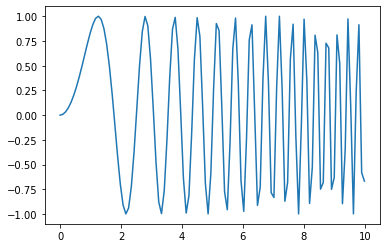

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.arange(0, 10, 0.09)
y = np.sin(x*x) 
plt.plot(x, y)

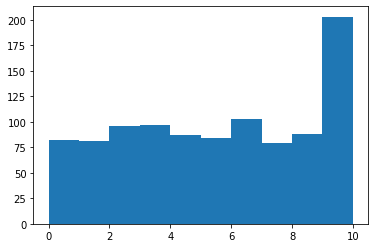

In [26]:
import random
import matplotlib.pyplot as plt 


sample = [random.randint(0,10) for _ in range(1000)]


print(sample[:20])

plt.hist(sample)
plt.show()

In [203]:
class Car(object):
    name = ""
    
    def __init__(self, name, color):
        super()
        self.color = color
        self.name = name

    @classmethod 
    def getname(self):
        return self.name  
    
    def __eq__(self,other):
        if isinstance(other, Car):
            return self.name == other.name
        return False

car1 = Car("audi","green")
car1.getname()

car2 = Car("skoda", "red")
car2.getname()

car3 = car1

testEqual = car1 == car2
print(testEqual)

testIdentity = car3 is car1
print(testIdentity)

arr1 = np.array([1, 2, 3], dtype='i')
arr2 = np.array([[100, 200, 3000,4000,5000,6000,7000,8000,9000], [-1,-3,-4,-5,-6,-7,-8,-9, -10]], dtype='i')

print(arr1.ndim)
print(arr2.ndim)
print(arr2[0,-1])
print(arr2[1][4:])
print(arr2.shape)
for x in np.nditer(arr2):
  print(x)
for idx, x in np.ndenumerate(arr1):
  print(idx, x)

arr0 = np.array([6, 7, 8, 9])

x = np.searchsorted(arr0, 7)

print(x)

arrB = np.array([41, 42, 43, 44])

x = [True, False, True, False]

newarrB = arrB[x]

print(newarrB)

False
True
1
2
9000
[ -6  -7  -8  -9 -10]
(2, 9)
100
200
3000
4000
5000
6000
7000
8000
9000
-1
-3
-4
-5
-6
-7
-8
-9
-10
(0,) 1
(1,) 2
(2,) 3
1
[41 43]


Pdsumowanie

